# Investigating Fandango Movie Ratings

** Investigating the Truth about Hickey's Analysis **

* [Before Hickey's Analysis](https://github.com/fivethirtyeight/data/tree/master/fandango)
* [After Hickey's Analysis](https://github.com/mircealex/Movie_ratings_2016_17)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fandango_before = pd.read_csv("fandango_score_comparison.csv")
fandango_after = pd.read_csv("movie_ratings_16_17.csv")
fandango_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
fandango_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [4]:
before = fandango_before[["FILM", "Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]].copy()
after = fandango_after[["movie", "year", "fandango"]].copy()
before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [5]:
after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [6]:
after = after[after["year"] == 2016].copy()
after["year"].value_counts()

2016    191
Name: year, dtype: int64

In [7]:
before = before[before["FILM"].str[-5:-1] == "2015"].copy()
before["FILM"].str[-5:-1].value_counts()

2015    129
Name: FILM, dtype: int64

([<matplotlib.axis.XTick at 0x7f4b3e5c9278>,
 <a list of 10 Text xticklabel objects>)

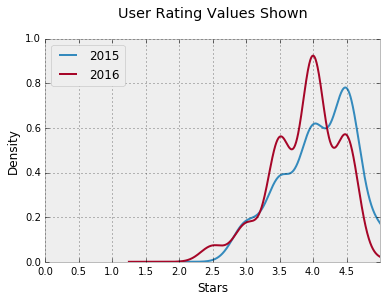

In [8]:
plt.style.use("bmh")
before["Fandango_Stars"].plot.kde(label="2015", legend=True)
after["fandango"].plot.kde(label="2016", legend=True)
plt.title("User Rating Values Shown\n")
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(np.arange(0,5.0,.5))

In [9]:
def freq_table_maker(series_obj):
    intervals = pd.interval_range(start=2, end=5, freq=0.5)
    freq_table = pd.Series([0,0,0,0,0,0], index=intervals)

    for star in series_obj:
        for interval in intervals:
            if star in interval:
                freq_table.loc[interval] += 1
                break
    
    freq_dist = round(freq_table / freq_table.sum() * 100, 2)
    return pd.DataFrame({'Percentile':freq_dist.values, 'Stars':freq_dist.index, })

print("Below are the distribution of stars for the year 2015:")
freq_table_maker(before["Fandango_Stars"])

Below are the distribution of stars for the year 2015:


,Percentile,Stars
0,0.00,"(2.0, 2.5]"
1,8.53,"(2.5, 3.0]"
2,17.83,"(3.0, 3.5]"
3,28.68,"(3.5, 4.0]"
4,37.98,"(4.0, 4.5]"
5,6.98,"(4.5, 5.0]"


In [10]:
print("Below are the distribution of stars for the year 2016:")
freq_table_maker(after["fandango"])

Below are the distribution of stars for the year 2016:


,Percentile,Stars
0,3.14,"(2.0, 2.5]"
1,7.33,"(2.5, 3.0]"
2,24.08,"(3.0, 3.5]"
3,40.31,"(3.5, 4.0]"
4,24.61,"(4.0, 4.5]"
5,0.52,"(4.5, 5.0]"


In [11]:


before["year"] = 2015
before.rename({"FILM": "movie",
               "Fandango_Stars": "fandango"}, axis=1, inplace=True)

before_and_after = pd.concat([after, before[["movie", "year", "fandango"]]], axis=0, ignore_index=True)

mean15 = before_and_after[before_and_after["year"] == 2015]["fandango"].agg(np.mean)
mean16 = before_and_after[before_and_after["year"] == 2016]["fandango"].agg(np.mean)
median15 = before_and_after[before_and_after["year"] == 2015]["fandango"].agg(np.median)
median16 = before_and_after[before_and_after["year"] == 2016]["fandango"].agg(np.median)
mode15 = before_and_after[before_and_after["year"] == 2015]["fandango"].mode()[0]
mode16 = before_and_after[before_and_after["year"] == 2016]["fandango"].mode()[0]

summary_stats = pd.DataFrame({"2015": [mean15, median15, mode15],
                              "2016": [mean16, median16, mode16]}, index=["mean", "median", "mode"])
summary_stats.head()



,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


([<matplotlib.axis.XTick at 0x7f4b360f60f0>,
 <a list of 11 Text xticklabel objects>)

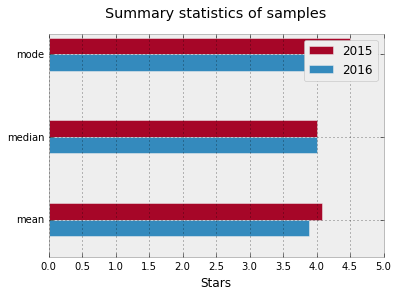

In [12]:
summary_stats["2015"].plot.barh(color="#a60628", position=0, legend=True, width=.20)
summary_stats["2016"].plot.barh(color="#348abd", position=1, legend=True, width=.20)
plt.title("Summary statistics of samples", y=1.05)
plt.xlim(0, 5)
plt.xlabel("Stars")
plt.xticks(np.arange(0,5.5,.5))

# conlusion

** There is, indeed, a difference in ratings of popular movies between 2015 and 2016. What we've seen so far is that popular movies released in year 2016 has lower ratings than of those released in 2015. From this, we can conclude that the "bug" has been fixed and their rating system was no longer biased as of 2016. **